In [79]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle
import numpy as np
import seaborn as sns
import time
%matplotlib inline


In [80]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)

In [284]:
df = pd.read_csv('weatherAUS.csv')
#df.head()


In [285]:
df.shape


(145460, 23)

In [234]:
df.describe()

,MinTemp,MaxTemp,dffall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [290]:
df_coord = pd.read_csv('coord.csv')
dfwithCoord = pd.merge(df, df_coord,on=['Location'], how='right')
print(dfwithCoord.shape)
#print(dfwithCoord.columns)



(71444, 27)


In [289]:
df=dfwithCoord
df.columns
df.Location.unique()


df[df['lat'] > -25]['lat_area']=1
df[(df['lat'] <= -25)]['lat_area']=0
#df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Location,MinTemp,MaxTemp,dffall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,dfToday,dfTomorrow,lat,long
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,-36.0806,146.9158
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,-36.0806,146.9158
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,-36.0806,146.9158
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,-36.0806,146.9158
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,-36.0806,146.9158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,NaN,NaN
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,NaN,NaN
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,NaN,NaN
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,NaN,NaN


In [282]:
sns.relplot(x=df['long'], y=df['lat'], hue=df['lat_area'], size=df['MaxTemp'])#abs(dfwithCoord['MaxTemp'] - dfwithCoord['MinTemp']))


KeyError: 'long'

<AxesSubplot:>

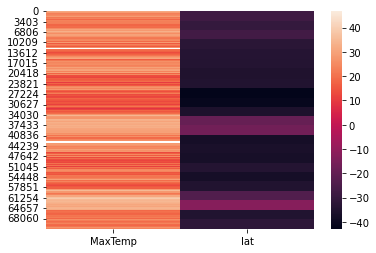

In [275]:
sns.heatmap(df[['MaxTemp', 'lat']])

0         Albury
1         Albury
2         Albury
3         Albury
4         Albury
           ...  
145455     Uluru
145456     Uluru
145457     Uluru
145458     Uluru
145459     Uluru
Name: Location, Length: 145460, dtype: object


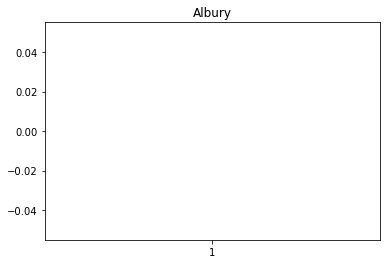

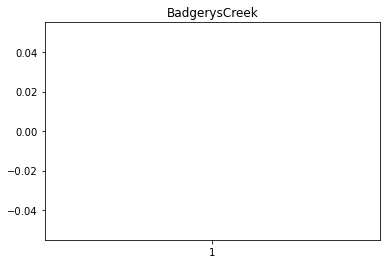

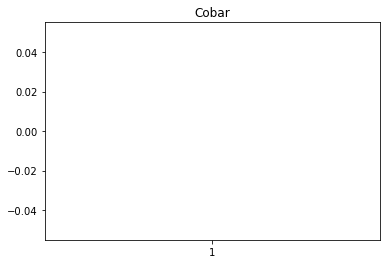

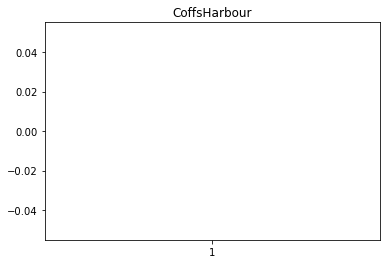

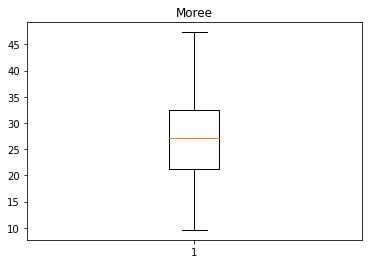

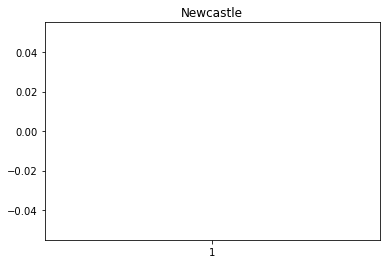

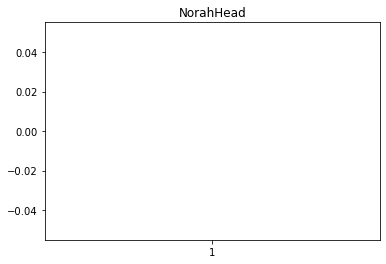

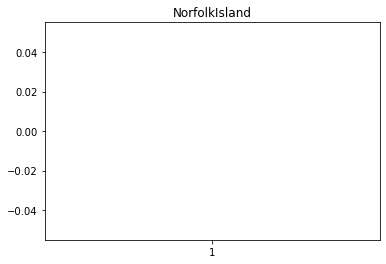

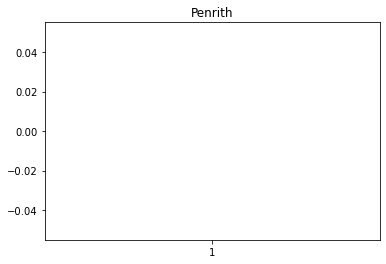

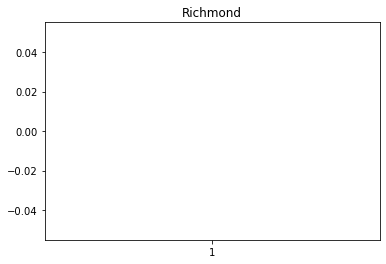

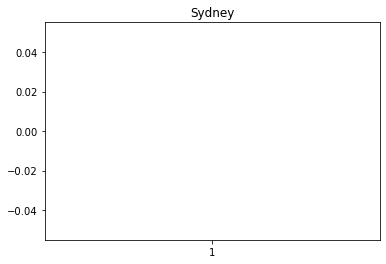

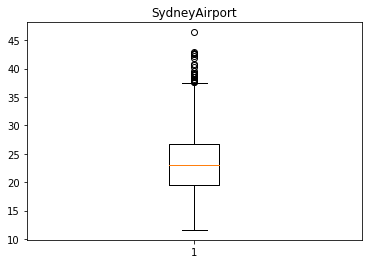

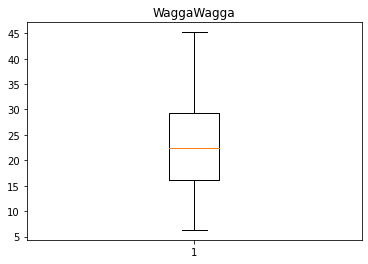

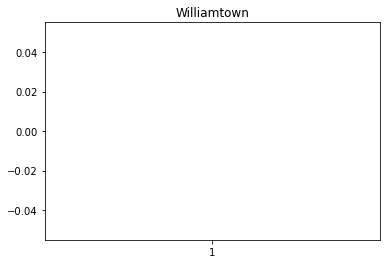

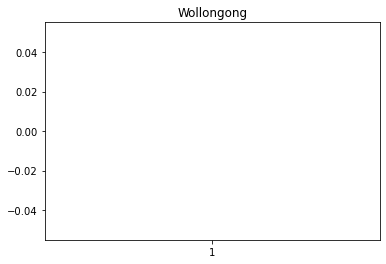

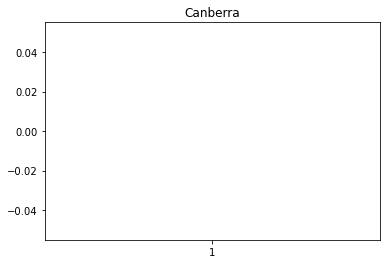

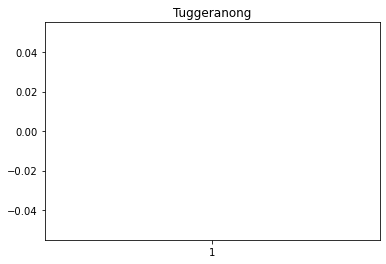

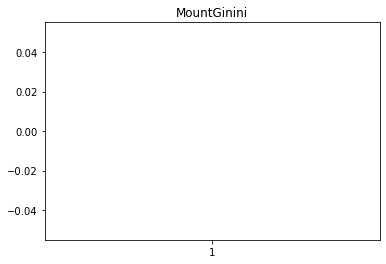

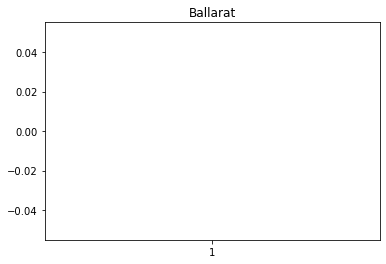

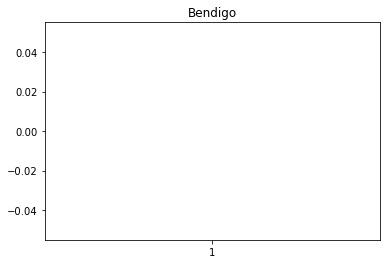

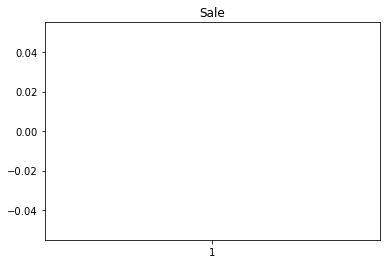

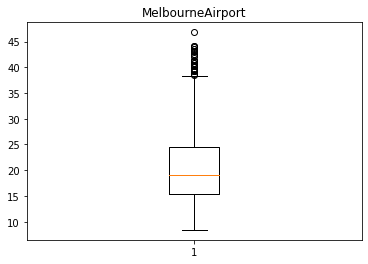

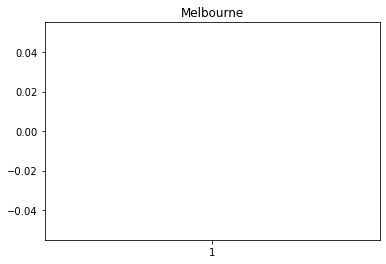

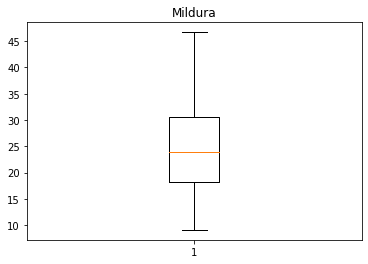

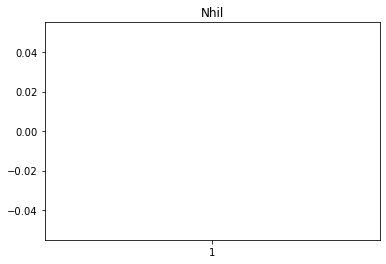

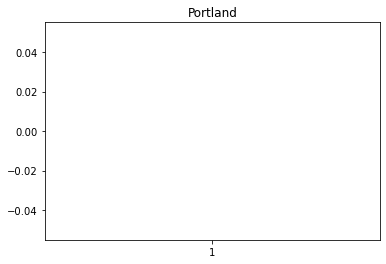

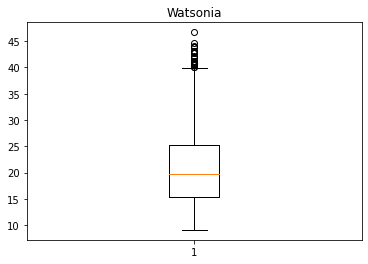

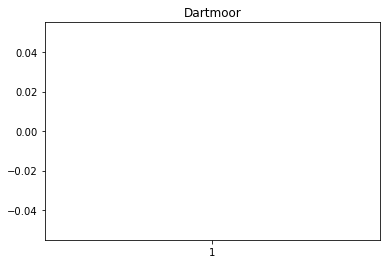

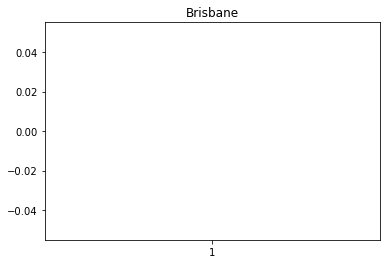

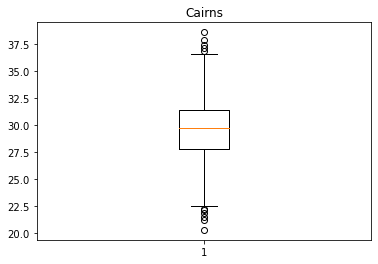

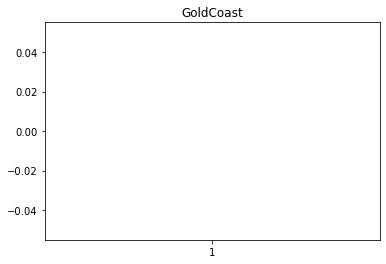

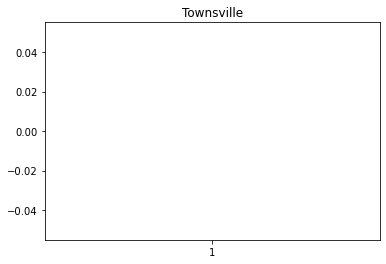

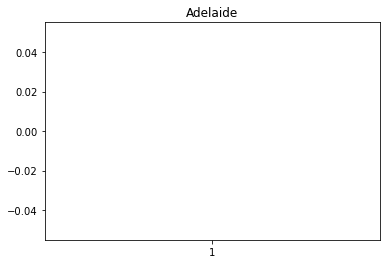

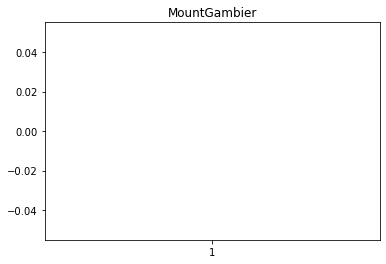

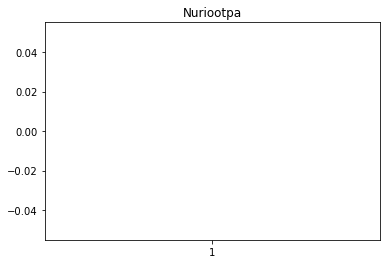

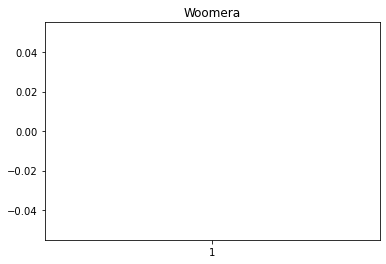

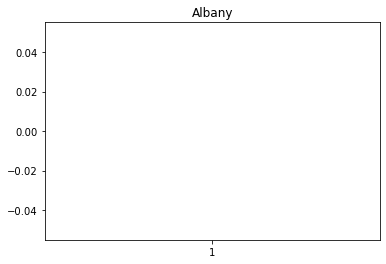

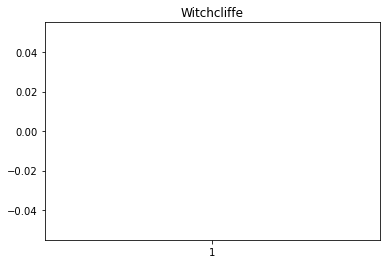

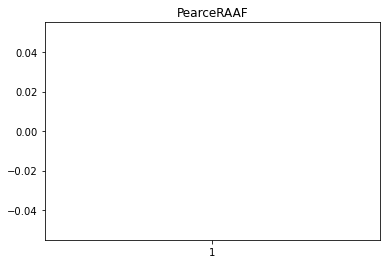

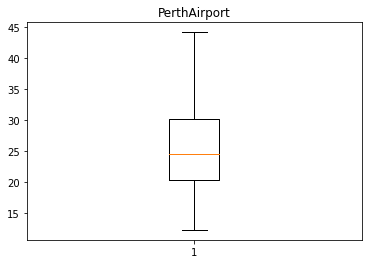

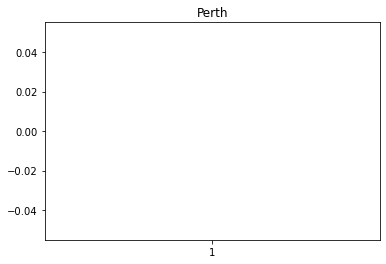

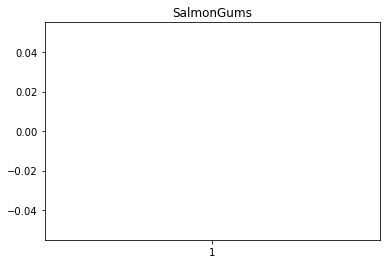

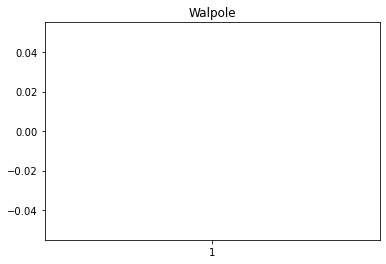

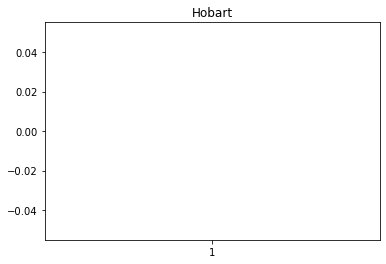

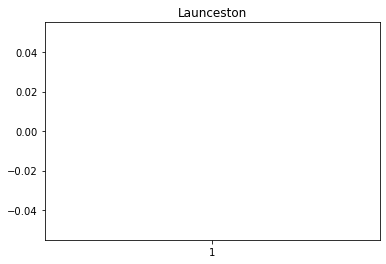

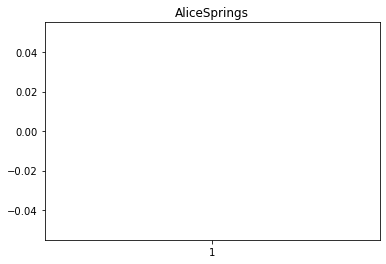

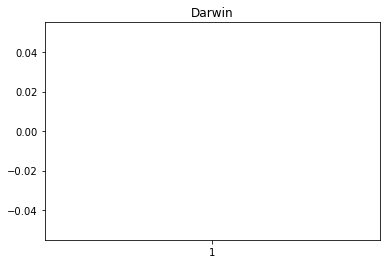

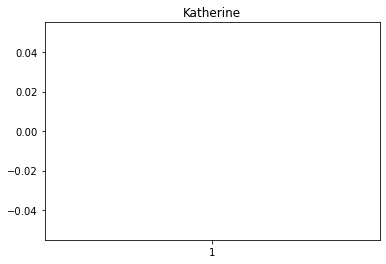

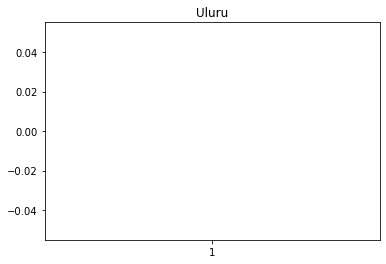

In [241]:

print(df['Location'])
#df_perloc
for c in df.Location.unique():
    dfc = df[df['Location']==c]
    dfc['Date'] = pd.to_datetime(dfc['Date'])
    #melb.head()
    plt.boxplot( dfc['MaxTemp'])
    plt.title(c)
    #print(c)
    plt.show()

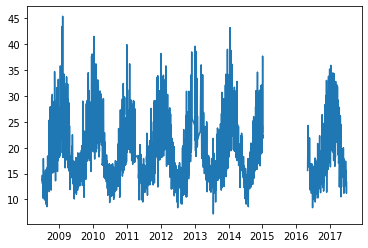

In [87]:
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

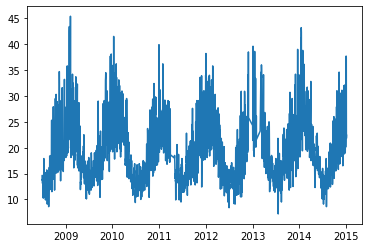

In [88]:
melb['Year'] = melb['Date'].apply(lambda x: x.year)
melb = melb[melb['Year']<=2015]
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

In [89]:
data = melb[['Date', 'Temp3pm']] 
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

,ds,y
67200,2008-07-01,14.6
67201,2008-07-02,13.7
67202,2008-07-03,13.9
67203,2008-07-04,13.1
67204,2008-07-05,14.6


# 2. Tdf Model

In [90]:
m = NeuralProphet()

In [91]:
model = m.fit(data, freq='D')#, epochs=1000)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 152


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.71E-02, min: 1.74E+00


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.71E-02, min: 2.78E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.41E-02
Epoch[152/152]: 100%|█| 152/152 [00:15<00:00,  9.56it/s, SmoothL1Loss=0.0145, MA


# 3. Forecast Away

In [92]:
future = m.make_future_dataframe(data, periods=900)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2015-01-06,None,26.429535,NaN,20.695038,5.455654,0.278842
1,2015-01-07,None,26.261150,NaN,20.698246,5.594951,-0.032047
2,2015-01-08,None,26.505497,NaN,20.701454,5.730534,0.073512
3,2015-01-09,None,26.615688,NaN,20.704659,5.861684,0.049345
4,2015-01-10,None,26.710808,NaN,20.707867,5.987721,0.015220


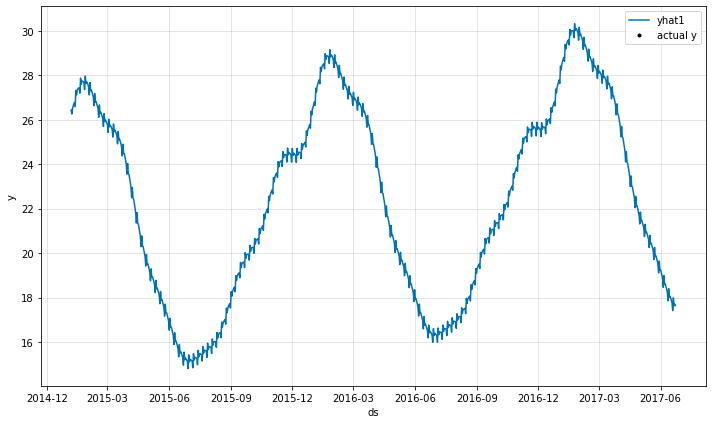

In [93]:
plot1 = m.plot(forecast)

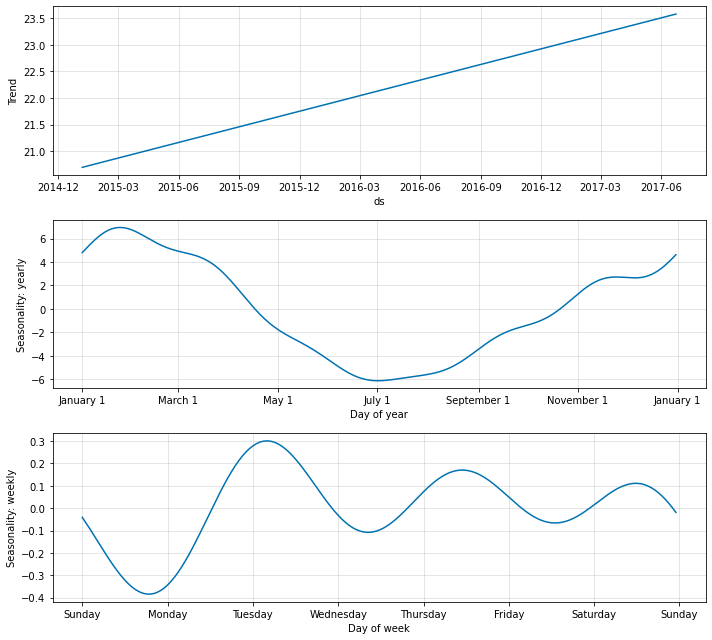

In [94]:
plt2 = m.plot_components(forecast)

# 4. Save Model

In [95]:
with open('saved_model.pkl', "wb") as f:
    pickle.dump(m, f)

In [96]:
del m

In [97]:
with open('saved_model.pkl', "rb") as f:
    m = pickle.load(f)

In [98]:
future = m.make_future_dataframe(data, periods=900)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2015-01-06,None,26.429535,NaN,20.695038,5.455654,0.278842
1,2015-01-07,None,26.261150,NaN,20.698246,5.594951,-0.032047
2,2015-01-08,None,26.505497,NaN,20.701454,5.730534,0.073512
3,2015-01-09,None,26.615688,NaN,20.704659,5.861684,0.049345
4,2015-01-10,None,26.710808,NaN,20.707867,5.987721,0.015220


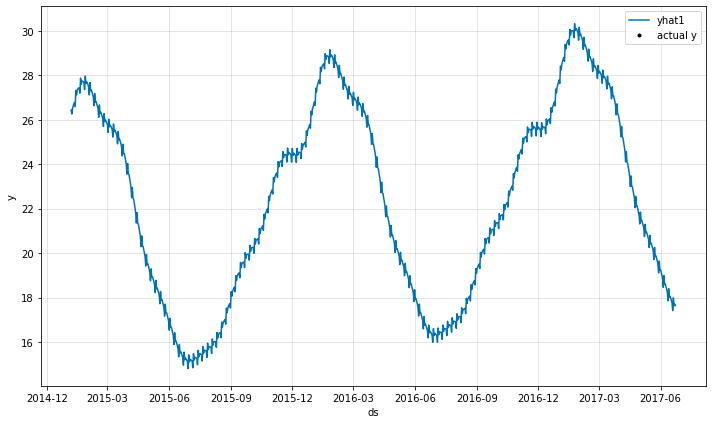

In [99]:
plot1 = m.plot(forecast)

